In [29]:
# import lib 
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from   sklearn.decomposition import PCA
import seaborn as sns

In [39]:
# read data from url
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

In [55]:
# view the data in numpy
iris_data_np = np.asarray(iris_data)[:,2:4].astype(np.float32)
print(iris_data_np[:10,:])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]


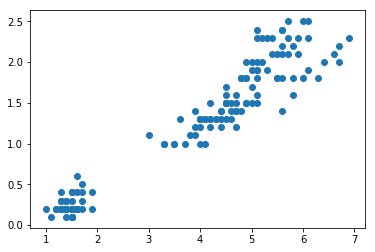

In [56]:
# view original data
plt.scatter(iris_data_np[:,0],iris_data_np[:,1]); plt.show()

(2, 2)


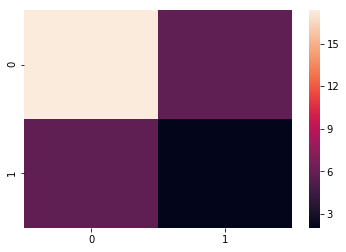

Projection Vector : 
 [[ 0.3198536  -0.94746697]
 [-0.94746697 -0.3198536 ]]


In [73]:
# get the cov and perform pca
my_cov = iris_data_np.T @ iris_data_np /(iris_data_np.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = iris_data_np   @ projection_vector
recovered_data     = projected_data @ np.linalg.inv(projection_vector)
print(projection_vector.shape); sns.heatmap(my_cov); plt.show()
print('Projection Vector : \n',projection_vector)

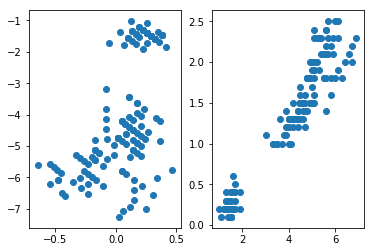

In [74]:
# view original data
plt.subplot(131); plt.scatter(projected_data[:,0],projected_data[:,1]); 
plt.subplot(132); plt.scatter(recovered_data[:,0],recovered_data[:,1]);
plt.subplot(133); plt.scatter(iris_data_np[:,0],iris_data_np[:,1]); 


plt.scatter(iris_data_np[:,0],iris_data_np[:,1]); plt.show()

In [28]:
! git add .
! git commit -m 'from mac'
! git push

[master 76403b56] from mac
 1 file changed, 179 insertions(+), 7 deletions(-)
Counting objects: 5, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 2.40 KiB | 2.40 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   ccf8ff1e..76403b56  master -> master
